In [129]:
import bigbang.mailman as mailman
import bigbang.graph as graph
import bigbang.process as process
from bigbang.parse import get_date
from bigbang.archive import Archive

In [130]:
import pandas as pd
import datetime
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math
import pytz
import pickle
import os

Now let's load the data for analysis.

In [131]:
ml_shortname = "public-tracking"

archive = Archive(ml_shortname, archive_dir='../../w3c-archives', mbox=True)
activity = archive.get_activity(resolved=False)

/home/npdoty/mailing-list-analysis/bigbang/bigbang/mailman.py:157: UserWarning: No mailing list name found at public-tracking
  warnings.warn("No mailing list name found at %s" % url)


This variable is for the range of days used in computing rolling averages.

In [132]:
window = 30

We'll include a list of the dates of face-to-face meetings to annotate on the timeline graphs.

In [144]:
f2fs = ['2011-09-21','2011-10-31','2012-01-24','2012-04-10','2012-06-20','2012-10-03','2013-02-11','2013-03-11','2013-05-06']
f2f_dates = [datetime.datetime.fromisoformat(x) for x in f2fs]

For each of the mailing lists we are looking at, plot the rolling average of number of emails sent per day.

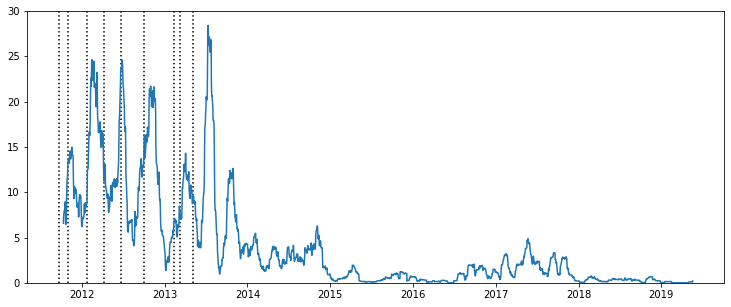

In [148]:
plt.figure(figsize=(12.5, 5))

ta = activity.sum(1)
rmta = ta.rolling(window).mean()
rmtadna = rmta.dropna()
plt.plot_date(np.array(rmtadna.index),
              np.array(rmtadna.values),
              fmt='-',
              xdate=True)

axes = plt.gca()
axes.set_ylim(0,30)

ymin, ymax = plt.ylim()
plt.vlines(f2f_dates, ymin=ymin, ymax=ymax, linestyles='dotted')

plt.savefig("public-tracking-activity-timeline.png")
plt.show()

Since this list has a pretty long history and the activity is unevenly spread over the time, we could also look at year-by-year graphs for closer inspection.

In [134]:
rmtadna["date"] = rmtadna.index.map(lambda x: date.fromordinal(int(x)))
rmtadna["date"] = pd.to_datetime(rmtadna["date"])

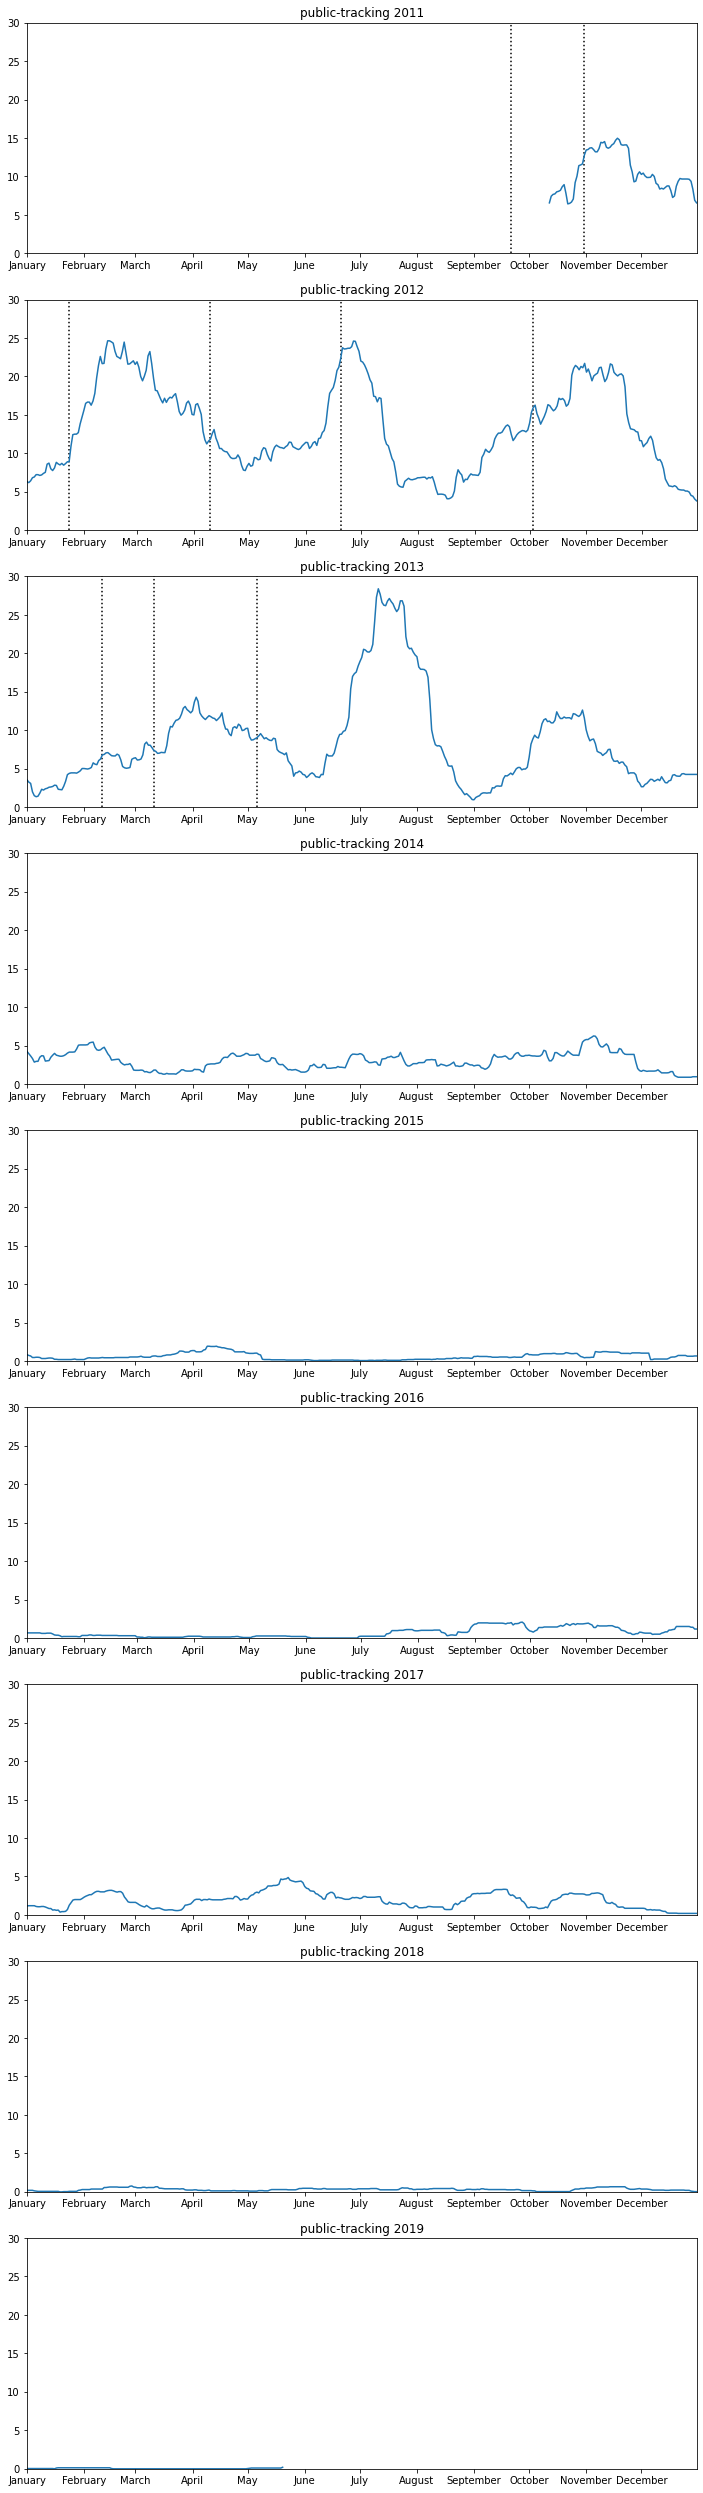

In [151]:
fig, axes = plt.subplots(9,1, sharey=True, figsize=(12,45))
years = list(range(2011,2020))
for i in range(0, len(years)):
    year_subset = df[str(years[i])]
    axes[i].set_xlim(date(years[i],1,1),date(years[i],12,31))
    axes[i].set_ylim(0,30)
    axes[i].plot_date(np.array(year_subset.index),
              np.array(year_subset.values),
              fmt='-',
              xdate=True,
            )
    axes[i].set_title(ml_shortname + ' ' + str(years[i]))
    
    locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
    formatter = mdates.DateFormatter('%B')
    axes[i].xaxis.set_major_locator(locator)
    axes[i].xaxis.set_major_formatter(formatter)
    
    axes[i].vlines(f2f_dates, ymin=ymin, ymax=ymax, linestyles='dotted')

fig.savefig("public-tracking-activity-yearly.png")

---


Now, let's see: who are the authors of the most messages to one particular list?

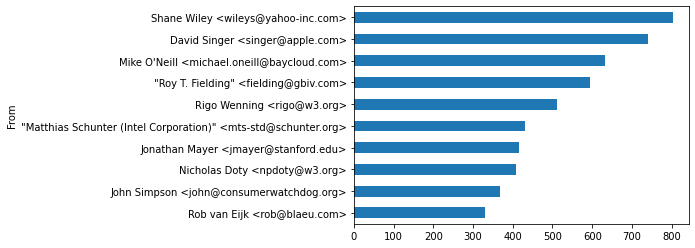

In [136]:
a  = activities[0] # for the first mailing list
ta = a.sum(0) # sum along the first axis
ta.sort_values(ascending=True)[-10:].plot(kind='barh')

This might be useful for seeing the distribution (does the top message sender dominate?) or for identifying key participants to talk to.